# Chapter 1 - Exploratory Data Analysis
This chapter introduces basics concepts in statistics.

In [29]:
import pandas as pd
import seaborn as sns
from scipy import stats
state = pd.read_csv('state.csv')
state.head(15)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [30]:
# Mean, trimmed mean and median for the population
print(state['Population'].mean())
print(state['Population'].median())
# We need scipy to do the trimmed mean, it drops 10% from each end
print(stats.trim_mean(state['Population'], 0.1))

6162876.3
4436369.5
4783697.125


## Estimates of Variability
Measures whether the data values are tightly clustered or spread out. Some are:
- **Deviations**: Difference between the observed values and the estimate of location. (errors, residuals)
- **Variance**: The sum of squared deviations from the mean divided by $n - 1$ where $n$ is the number of data values. (mean-squared-error)
- **Standard deviation**: square root of the variance
- **Mean absolute deviation**: The mean of the absolute values of the deviations from the mean. ( l1-norm, Manhattan norm)
- **Median absolute deviation from the median (MAD)**: 
- **Range**: THe difference between the largest and the smallest value in dataset.
- **Order statistics**: Metrics based on the data values sorted from smallest to biggest. (ranks)
- **Percentile**: The value such that P percent of the values take on this value or less and (100-P) percent take on this value or more. (quantile)
- **Interquartile range**: Difference between the 75th and the 25th percentile. (IQR)

The standard deviation is preferred in statistics over the mean absolute deviation

In [31]:
# standard deviation
print(state['Population'].std())
# the interquartile range (IQR)
print(state['Population'].quantile(.75) - state['Population'].quantile(.25))
# median absolute deviation from the median (MAD)
from statsmodels.robust.scale import mad
print(mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


## Exploring the Data Distribution
- **Boxplot**: are based on percentiles.
- **Frequency table**
- **Histogram**
- **Density plot**

In [32]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

<AxesSubplot:>

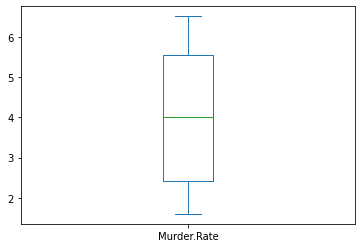

In [33]:
# boxplot of custom quantiles
(state['Murder.Rate']
.quantile([0.05, 0.25, 0.5, 0.75, 0.95])
.plot.box())

Text(0, 0.5, 'Population (millions)')

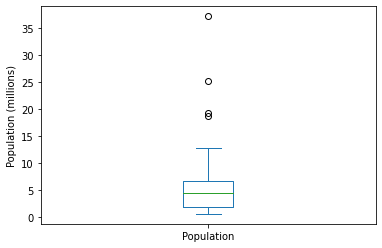

In [34]:
ax = (state['Population'] / 1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

The points are outliers, the green line represents the median, the top and bottom of the box are the 75th and 25th percentiles. The whiskers wil not go beyond 1.5 times the IQR.

## Frequency Tables and Histograms

It divides up the varaible range into equally spaced segments and count how many fall within each segment.

In [35]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

**Bin sizes** are important, if they are too large, important features of the distribution can be obscured, if they are too small, the result is too granular and we can't see the bigger picture.

A **histogram** is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis.

Text(0.5, 0, 'Population (millions')

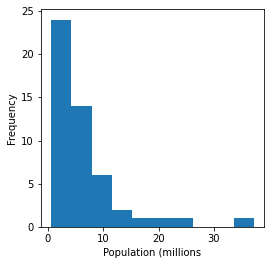

In [36]:
# Creating a histogram
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions')

### Statistical Moments
- First moment: location
- Second moment: variability
- Third moment: skewness, data skewed to larger or smaller values.
- Fourth moment: kurtosis, propensity of the data to have extreme values.

Metrics does not measure skewness and kurtosis, this are discoverd through visualizations.

## Density plots and Estimates

A density plot can be thought of as a smoothed histogram, it is computed from the data through a kernel density.

Text(0.5, 0, 'Murder rate (per 100,000)')

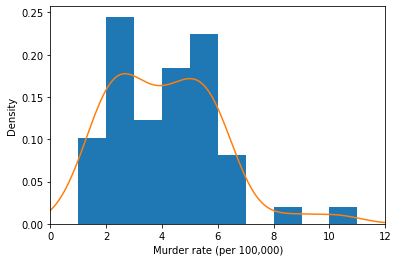

In [37]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder rate (per 100,000)')

Instead of counts bins, the are under the curve between any two points no the x-axis is calculated, and it correspond to the proportion of the distribution lying between those two points.

## Exploring Binary and Categorical Data

Bar charts are popular with categorical data, the columns are in the x-axis and the count is in the y-axis

Text(0, 0.5, 'Count')

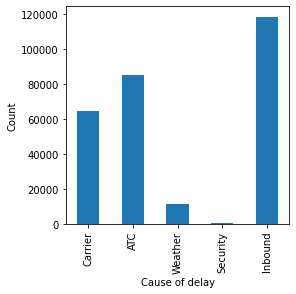

In [38]:
dfw = pd.read_csv('airline_delays.csv')
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In a histogram, the bars are typically shown touching each other, in a bar plot the bars are separated.

**Mode**: value(s) that appears most often in the data. Summary statistic for categorical data and is generally not used for numeric data.

**Expected Value**: Sum of values times their probability of accurrence, often used to sum up factor variable levels.

## Correlation 

Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go
with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

**Pearson correlation:**

$$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {(n-1)\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

<AxesSubplot:>

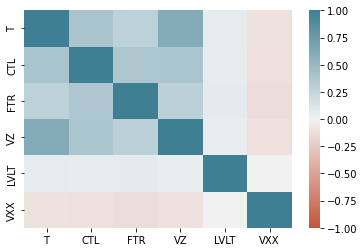

In [39]:
sp500 = pd.read_csv('sp500_data.csv.gz', compression='gzip')
sp500 = sp500[['T', 'CTL', 'FTR', 'VZ', 'LVLT', 'VXX']]
sns.heatmap(sp500.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data. Scikit-learn provide a variety of approaches. Even though, Person's correlation is the most used for exploratory analysis.

### Scatterplots

The standard way to visualize the relationship between two measured data variables is with a scatterplot.

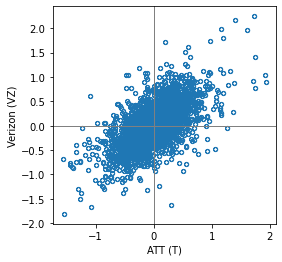

In [40]:
ax = sp500.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

## Exploring two or more variables

**Contingency table:** A tally of counts between two or more categorical varibles.

**Hexagonal binning:** A plot of two numeric variables with the records binned into hexagons.

**Contour plot:** A plot showing the density of two numeric variables like a topographical map.

**Violin plot:** Similar to a box plot but showing the density estimate.

Bivariate analysis involves both computing summary statistics and producing visual displays. Depends on the nature of the data: numeric vs categorical.

### Haxagonal Binning

Scatterplots are not good when there a lot of data values, we need a different way to visualize the relationship.

In [ ]:
kc_tax0 = pd.read_csv('')
#Removing outliers
kc_tax0 = kc_tax0.loc[(kc_tax0.TaxAssessedValue < 750000) &
                      (kc_tax0.SqFtTotLiving > 100) &
                      (kc_tax0.SqFtTotLiving < 3500), :]
# Plotting
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y='TaxAssessedValue', 
                         gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')
                        